In [1]:
#Import Packages

import os, datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import sklearn,pickle
# from sklearn.utils.class_weight import compute_class_weight


In [2]:
#2. Data Loading
CSV_PATH = r'C:\Users\User\Desktop\AI_ML_TRAINING\YPAI09\Capstone\Capstone 2\Dataset\ecommerceDataset.csv'
df = pd.read_csv(CSV_PATH)

In [3]:
#2. Data Loading
print(df.info())
print(df.describe())

#the data has 2 objects which are text,
# have 4 unique  which means have 4 categories
# the column has no name
# 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [4]:
# 3. Data Exploratary
# Set columns name


column_names = ['category','text']


#read back in out csv file
df= pd.read_csv(CSV_PATH, names= column_names)

# check back the data after naming the columns
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  50425 non-null  object
 1   text      50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB
None
         category                                               text
count       50425                                              50424
unique          4                                              27802
top     Household  Think & Grow Rich About the Author NAPOLEON HI...
freq        19313                                                 30


In [5]:
 # 3. Data Exploratary and Inspection

print('Shape of the data:', df.shape)
print('Data description:', df.describe())
print('NA values:', df.isna().sum())
print('Duplicate value:', df.duplicated().sum())
print('Categories:', df['category'].value_counts())

#The categories are household,books, electronics, clothing & Accessories
# There are 1 missing value in text column
# Count have 50K words



Shape of the data: (50425, 2)
Data description:          category                                               text
count       50425                                              50424
unique          4                                              27802
top     Household  Think & Grow Rich About the Author NAPOLEON HI...
freq        19313                                                 30
NA values: category    0
text        1
dtype: int64
Duplicate value: 22622
Categories: category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64


In [6]:
 # 3. Data Exploratary and Inspection
# replace the null value
df['text'] = df['text'].fillna('missing')
df.isna().sum()


category    0
text        0
dtype: int64

In [7]:
#4. Data Preprocessing

#(A) Separate the feature and label
import sklearn.preprocessing


feature = df['text'].values
label = df['category'].values

#(B) Perform label encoding to the category
label_encoder = sklearn.preprocessing.LabelEncoder()
label_encoded= label_encoder.fit_transform(label) 
label_encoded[:5]

array([3, 3, 3, 3, 3])

In [8]:
# To see the index of the columns
sample_categories = label_encoder.inverse_transform([0,1,2,3])
print(sample_categories)

['Books' 'Clothing & Accessories' 'Electronics' 'Household']


In [9]:
#5. Perform train-val-test split
import sklearn.model_selection

seed = 42
x_train, x_split, y_train, y_split = sklearn.model_selection.train_test_split(feature, label_encoded, train_size=0.7, random_state = seed)

x_val, x_test, y_val, y_test = sklearn.model_selection.train_test_split(x_split, y_split, train_size=0.5, random_state=seed)

In [10]:
#6. NLP

# (A) Tokenization ( step 1-2)
tokenizer = keras.layers.TextVectorization(max_tokens = 5000,
                                           output_sequence_length = 200)
tokenizer.adapt(x_train)

In [11]:
# (B) Embedding
#  Define the embedding layers

embedding = keras.layers.Embedding (5000,64, trainable= True)

In [12]:
#7. Model Development
# begin with NLP layers first

model = keras.Sequential()

# (A) NLP layers
model.add(tokenizer)
model.add(embedding)

#(B) RNN - single layer bidirectional LSTM Layer
model.add(keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences=False)))
model.add(keras.layers.Dense(len(df['category'].unique()), activation = 'softmax')) 


In [13]:
 #8. Model Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])


In [14]:
#9. Model Training
logpath = 'tensorboard/ecommerce/' + datetime.datetime.now().strftime('%Y-%m-%d %H%M%S')
tb = keras.callbacks.TensorBoard(logpath)
es = keras.callbacks.EarlyStopping(patience=2, verbose=3)

history = model.fit(x_train, y_train,
                    validation_data=(x_val,y_val),
                    epochs = 10,
                    batch_size= 32,
                    callbacks=[tb,es])

Epoch 1/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 33s 27ms/step - accuracy: 0.8137 - loss: 0.5091 - val_accuracy: 0.9549 - val_loss: 0.1599
Epoch 2/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.9713 - loss: 0.1064 - val_accuracy: 0.9650 - val_loss: 0.1323
Epoch 3/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.9822 - loss: 0.0692 - val_accuracy: 0.9684 - val_loss: 0.1217
Epoch 4/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.9864 - loss: 0.0509 - val_accuracy: 0.9684 - val_loss: 0.1431
Epoch 5/10
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 49s 44ms/step - accuracy: 0.9891 - loss: 0.0384 - val_accuracy: 0.9701 - val_loss: 0.1310
Epoch 5: early stopping


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 200)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,278 (3.95 MB)

 Trainable params: 345,092 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 690,186 (2.63 MB)

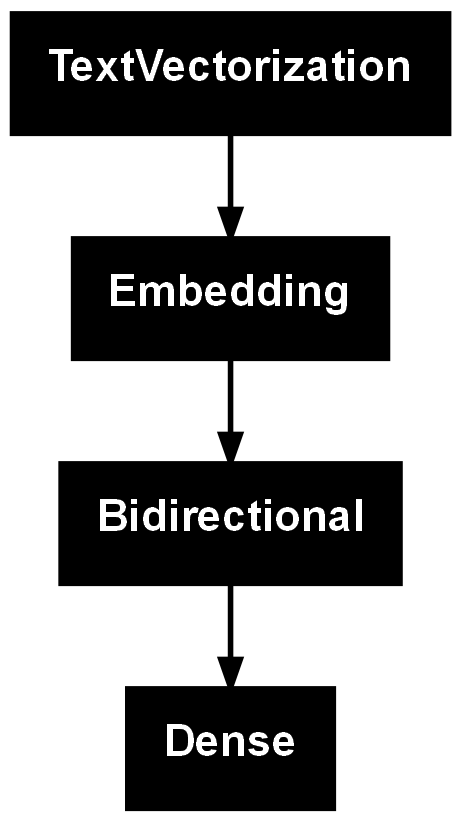

In [15]:
model.summary()
keras.utils.plot_model(model)


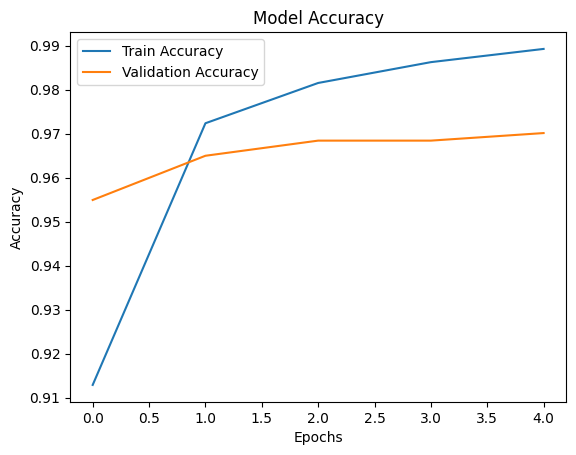

In [16]:
#Plot Accuracy Graph

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

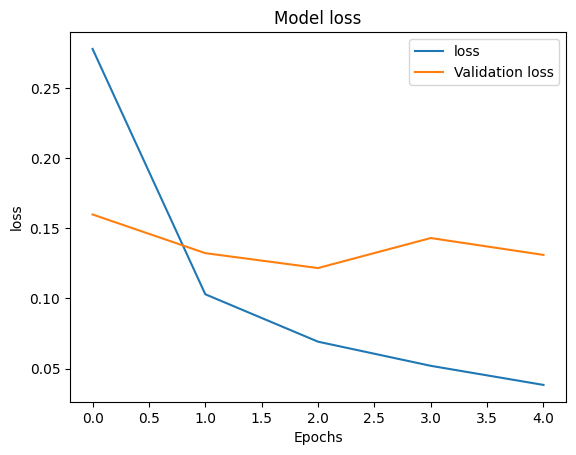

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
evaluation = model.evaluate(x_test, y_test)
print(evaluation)

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9739 - loss: 0.1058
[0.12739050388336182, 0.9701216220855713]


In [19]:
from sklearn.metrics import classification_report
prediction = model.predict(x_test)
prediction_index = np.argmax(prediction, axis=1)

model_report = classification_report(y_test, prediction_index)
print(model_report)

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1765
           1       0.98      0.99      0.98      1346
           2       0.96      0.96      0.96      1509
           3       0.97      0.98      0.97      2944

    accuracy                           0.97      7564
   macro avg       0.97      0.97      0.97      7564
weighted avg       0.97      0.97      0.97      7564



In [20]:
# Calculation Of F1 Score

predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_pred = y_pred.reshape(1,-1)
print(y_pred.shape)

y_test = y_test.reshape(1,-1)
print(y_test.shape)

metric = keras.metrics.F1Score(threshold=0.5)
metric.update_state(y_test, y_pred)
result = metric.result()
print(result)

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
(1, 7564)
(1, 7564)
tf.Tensor([0.        1.5       1.5       ... 1.5       0.9999998 0.       ], shape=(7564,), dtype=float32)


In [21]:
#10. Model Evaluation 
#model evaluation using MAE
loss = evaluation[:1]
accuracy = evaluation[1:]
print(f"Loss is\n",loss)
print(f"Accuracy is\n",accuracy)

Loss is
 [0.12739050388336182]
Accuracy is
 [0.9701216220855713]


In [22]:
#11. Use the model for inference

predictions = model.predict(x_test[:3]) # prediction in form of softmax

class_predicitons = label_encoder.inverse_transform(np.argmax(predictions, axis=1)) #turn back  the number of the class using label encode
print(x_test[:3])
print(class_predicitons)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
['72 Music Scales: For Composers & Improvising Musicians '
 'Anchor Fly with Me Stitch Kit A range of over 300 d-i-y kits with easy to make embroidery designs on canvas. Anchor stitch kits contain everything you need to help you make your own special embroidery creation. Happy crafting.'
 "Wall1ders Atulya Arts 3D Hexagon Acrylic Stickers with 20 Butterfly Wall Stickers (Silver) -Pack of 14 First Time in India!!! An INDIAN COMPANY named “Atulya Arts” presenting new trend of wall decoration in 3D acrylic, made using imported cast acrylic with computerized laser cutting method. Design you wall with your own creativity Buy from trusted name only!!! 'Atulya Arts' products are of premium quality and use only high standard material. Our products are quality controlled and pre stocked. Atulya Arts - Presenting high quality 3D Mirror or 3D acrylic sticker, Search Atulya Arts - acrylic, Atulya Arts - acrylic sticker that is affixed to a wall or other smooth

In [23]:
# 11. Save necessary component in  model for deployment using streamlit
#  (label encoder, model development)

#(A) Save Label encode
with open('Model/ecommerce.pkl','wb') as f:
    pickle.dump(label_encoder,f)

In [24]:
#(B) Save model

keras.models.save_model(model,"Model/ecommerce_classifier.h5")

In [25]:
#(C)  Save Tokenizer
with open('Model/tokenizer.json','wb') as f:
    pickle.dump(tokenizer,f)